# DSE5002 Python Project
## Joseph Annand
## 8/25/2023

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data Sets

In [2]:
cost_of_living_data = pd.read_csv("cost_of_living.csv")
ds_salaries = pd.read_csv("ds_salaries.csv")
levels_fyi_salary_data = pd.read_csv("Levels_Fyi_Salary_Data.csv")
country_codes_data = pd.read_excel("country_codes.xlsx")

### Wrangle Levels.fyi Data

In [3]:
levels_fyi_data = pd.DataFrame(levels_fyi_salary_data.loc[levels_fyi_salary_data['title'].str.contains("(D|d)ata"), :])
new = levels_fyi_data["location"].str.split(", ", n = -1, expand = True)
levels_fyi_data['city'] = new[0]
levels_fyi_data['state.or.province'] = new[1]
levels_fyi_data['country'] = new[2]
levels_fyi_data.rename(columns={'title': 'job_title', 'totalyearlycompensation': 'salary_in_usd'}, inplace=True)
levels_fyi_data.reset_index(inplace=True)
for i in range(len(levels_fyi_data)):
    if pd.isnull(levels_fyi_data.at[i, 'country']):
        levels_fyi_data.loc[i, 'country'] = "United States"

C:\Users\janna\AppData\Local\Temp\ipykernel_23848\4087661922.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  levels_fyi_data = pd.DataFrame(levels_fyi_salary_data.loc[levels_fyi_salary_data['title'].str.contains("(D|d)ata"), :])


### Wrangle ds_salaries Data

In [4]:
ds_salaries.rename(columns={'company_location': 'country'}, inplace=True)
for i in range(len(ds_salaries)):
    code = ds_salaries.at[i, 'country']
    conversion = pd.DataFrame(country_codes_data.loc[country_codes_data['Alpha-2 code'] == code, 'Country']).iat[0,0]
    ds_salaries.loc[i, 'country'] = conversion

### Wrangle cost_of_living Data

In [5]:
cost_of_living_data.rename(columns={'City': 'location'}, inplace=True)
new = cost_of_living_data['location'].str.split(", ", n=-1, expand=True)
cost_of_living_data['city'] = new[0]
cost_of_living_data['state.or.province'] = new[1]
cost_of_living_data['country'] = new[2]
for i in range(len(cost_of_living_data)):
    if pd.isnull(cost_of_living_data.at[i, 'country']):
        cost_of_living_data.loc[i, 'country'] = cost_of_living_data.at[i, 'state.or.province']

### Adjust country_codes data

In [6]:
us_code_index = country_codes_data.index[country_codes_data['Alpha-2 code'] == "US"].tolist()
country_codes_data.loc[us_code_index[0], 'Country'] = "United States"

### Merge and subset salary data

In [7]:
all_salaries_df = pd.merge(levels_fyi_data, 
                           ds_salaries, 
                           how='outer')
cleaned_salary = all_salaries_df.loc[:, 
                                    ['job_title', 'salary_in_usd', 'city', 'state.or.province', 'country']]

### Determine ratings by city

In [8]:
city_median_df = pd.DataFrame(cleaned_salary.groupby(by="city")['salary_in_usd'].median())
city_median_df.reset_index(inplace=True)

city_rankings_df = pd.merge(city_median_df, 
                            cost_of_living_data, 
                            how='outer')
city_rankings_df = city_rankings_df.assign(cost_rating = lambda x: city_rankings_df['salary_in_usd'] / city_rankings_df['Cost of Living Index'],
                                          rent_rating = lambda x: city_rankings_df['salary_in_usd'] / city_rankings_df['Rent Index'],
                                          living_rent_rating = lambda x: city_rankings_df['salary_in_usd'] / city_rankings_df['Cost of Living Plus Rent Index'],
                                          groceries_rating = lambda x: city_rankings_df['salary_in_usd'] / city_rankings_df['Groceries Index'],
                                          restaurant_rating = lambda x: city_rankings_df['salary_in_usd'] / city_rankings_df['Restaurant Price Index'],
                                          purchase_rating = lambda x: city_rankings_df['salary_in_usd'] / city_rankings_df['Local Purchasing Power Index'])

### Visualizations for City Data

Text(0.5, 1.0, 'Top 5 Cities in Cost of Living Rating')

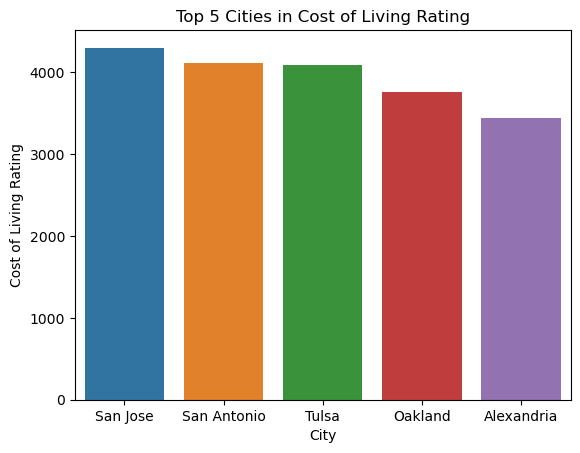

In [9]:
cost = city_rankings_df.sort_values(by=['cost_rating'], ascending=False).reset_index().loc[0:4, ['city', 'cost_rating']]
sns.barplot(data=cost, x='city', y='cost_rating')
plt.xlabel("City")
plt.ylabel("Cost of Living Rating")
plt.title("Top 5 Cities in Cost of Living Rating")

Text(0.5, 1.0, 'Top 5 Cities in Cost of Rent Rating')

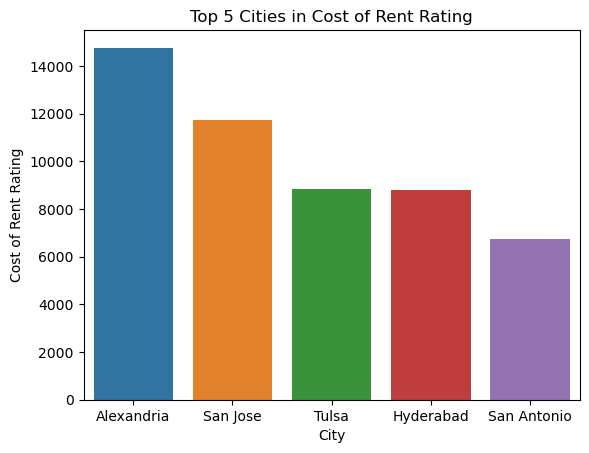

In [10]:
rent = city_rankings_df.sort_values(by=['rent_rating'], ascending=False).reset_index().loc[0:4, ['city', 'rent_rating']]
sns.barplot(data=rent, x='city', y='rent_rating')
plt.xlabel("City")
plt.ylabel("Cost of Rent Rating")
plt.title("Top 5 Cities in Cost of Rent Rating")

Text(0.5, 1.0, 'Top 5 Cities in Cost of Living and Rent Rating')

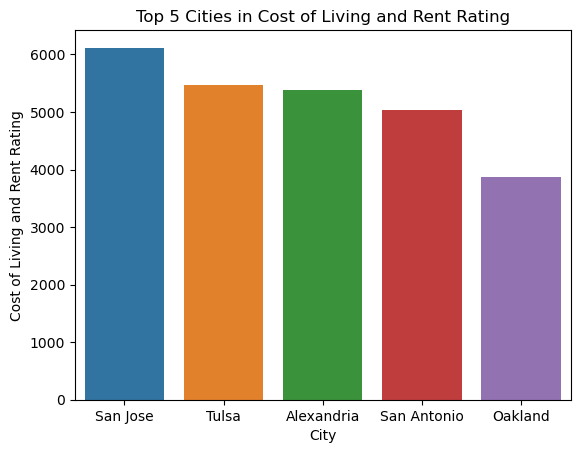

In [11]:
living_rent = city_rankings_df.sort_values(by=['living_rent_rating'], ascending=False).reset_index().loc[0:4, ['city', 'living_rent_rating']]
sns.barplot(data=living_rent, x='city', y='living_rent_rating')
plt.xlabel("City")
plt.ylabel("Cost of Living and Rent Rating")
plt.title("Top 5 Cities in Cost of Living and Rent Rating")

Text(0, 0.5, 'Top 5 Cities in Cost of Groceries Rating')

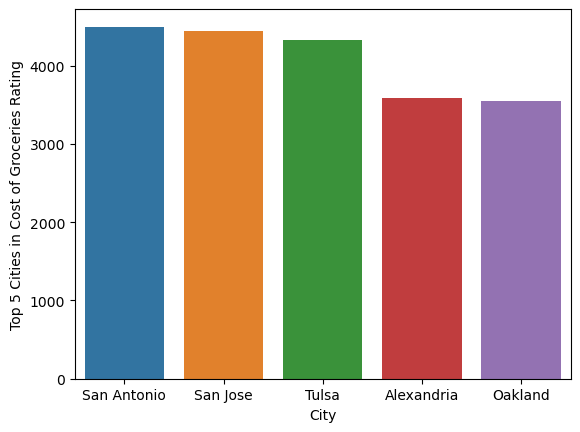

In [12]:
groceries = city_rankings_df.sort_values(by=['groceries_rating'], ascending=False).reset_index().loc[0:4, ['city', 'groceries_rating']]
sns.barplot(data=groceries, x='city', y='groceries_rating')
plt.xlabel("City")
plt.ylabel("Cost of Groceries Rating")
plt.ylabel("Top 5 Cities in Cost of Groceries Rating")

Text(0, 0.5, 'Top 5 Cities in Restaurant Prices Rating')

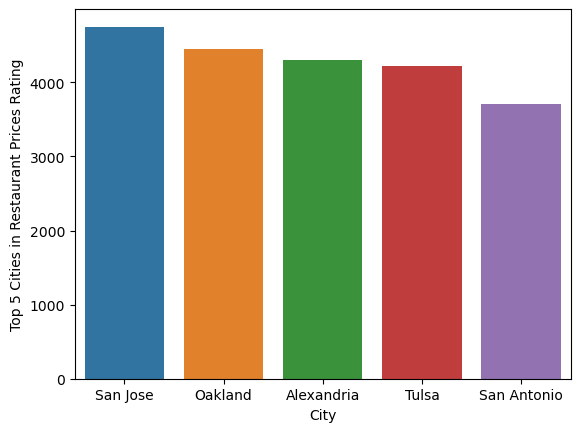

In [13]:
restaurant = city_rankings_df.sort_values(by=['restaurant_rating'], ascending=False).reset_index().loc[0:4, ['city', 'restaurant_rating']]
sns.barplot(data=restaurant, x='city', y='restaurant_rating')
plt.xlabel("City")
plt.ylabel("Restuarant Prices Rating")
plt.ylabel("Top 5 Cities in Restaurant Prices Rating")

Text(0, 0.5, 'Top 5 Cities in Purchasing Power Rating')

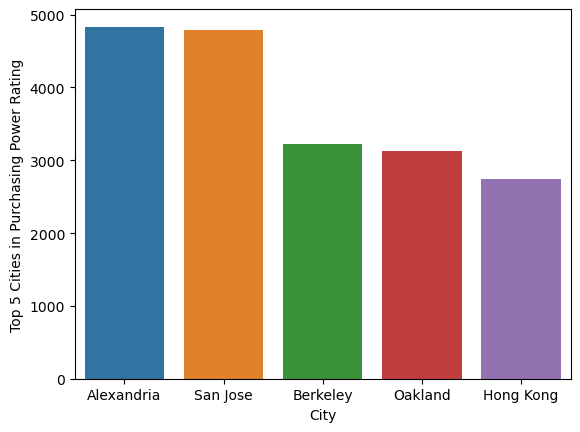

In [14]:
purchase = city_rankings_df.sort_values(by=['purchase_rating'], ascending=False).reset_index().loc[0:4, ['city', 'purchase_rating']]
sns.barplot(data=purchase, x='city', y='purchase_rating')
plt.xlabel("City")
plt.ylabel("Purchasing Power Rating")
plt.ylabel("Top 5 Cities in Purchasing Power Rating")

### Top 5 Cities by Index

In [15]:
print("Top 5 Cities in Cost of Living:")
print(cost)
print("--------------------------------")
print("Top 5 Cities in Cost of Rent:")
print(rent)
print("--------------------------------")
print("Top 5 Cities in Cost of Rent and Living:")
print(living_rent)
print("--------------------------------")
print("Top 5 Citits in Cost of Groceries:")
print(groceries)
print("--------------------------------")
print("Top 5 Cities in Restaurant Prices:")
print(restaurant)
print("--------------------------------")
print("Top 5 Citites in Purchase Power:")
print(purchase)
print("--------------------------------")

Top 5 Cities in Cost of Living:
          city  cost_rating
0     San Jose  4302.203568
1  San Antonio  4114.075731
2        Tulsa  4089.815557
3      Oakland  3766.275691
4   Alexandria  3447.062962
--------------------------------
Top 5 Cities in Cost of Rent:
          city   rent_rating
0   Alexandria  14759.036145
1     San Jose  11734.401832
2        Tulsa   8817.427386
3    Hyderabad   8809.891808
4  San Antonio   6728.507970
--------------------------------
Top 5 Cities in Cost of Rent and Living:
          city  living_rent_rating
0     San Jose         6117.576843
1        Tulsa         5462.724936
2   Alexandria         5378.704720
3  San Antonio         5030.279351
4      Oakland         3866.548829
--------------------------------
Top 5 Citits in Cost of Groceries:
          city  groceries_rating
0  San Antonio       4497.816594
1     San Jose       4442.999567
2        Tulsa       4330.106979
3   Alexandria       3585.803147
4      Oakland       3554.743043
-------------

### Determine ratings by country

In [16]:
country_median_df = pd.DataFrame(cleaned_salary.groupby(by="country")['salary_in_usd'].median())
country_median_df.reset_index(inplace=True)
cost_country_group = pd.DataFrame(cost_of_living_data.groupby(by="country").agg('median'))
cost_country_group.reset_index(inplace=True)

country_rankings_df = pd.merge(country_median_df, 
                            cost_country_group, 
                            how='outer')
country_rankings_df = country_rankings_df.assign(cost_rating = lambda x: country_rankings_df['salary_in_usd'] / country_rankings_df['Cost of Living Index'],
                                          rent_rating = lambda x: country_rankings_df['salary_in_usd'] / country_rankings_df['Rent Index'],
                                          living_rent_rating = lambda x: country_rankings_df['salary_in_usd'] / country_rankings_df['Cost of Living Plus Rent Index'],
                                          groceries_rating = lambda x: country_rankings_df['salary_in_usd'] / country_rankings_df['Groceries Index'],
                                          restaurant_rating = lambda x: country_rankings_df['salary_in_usd'] / country_rankings_df['Restaurant Price Index'],
                                          purchase_rating = lambda x: country_rankings_df['salary_in_usd'] / country_rankings_df['Local Purchasing Power Index'])

C:\Users\janna\AppData\Local\Temp\ipykernel_23848\1076841768.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cost_country_group = pd.DataFrame(cost_of_living_data.groupby(by="country").agg('median'))


Text(0.5, 1.0, 'Top 5 Countries in Cost of Living Rating')

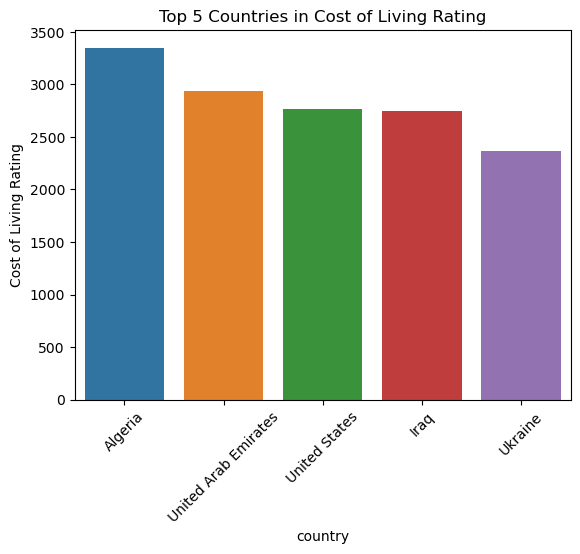

In [17]:
cost = country_rankings_df.sort_values(by=['cost_rating'], ascending=False).reset_index().loc[0:4, ['country', 'cost_rating']]
sns.barplot(data=cost, x='country', y='cost_rating')
plt.xlabel("country")
plt.xticks(rotation=45)
plt.ylabel("Cost of Living Rating")
plt.title("Top 5 Countries in Cost of Living Rating")

Text(0.5, 1.0, 'Top 5 Countries in Cost of Rent Rating')

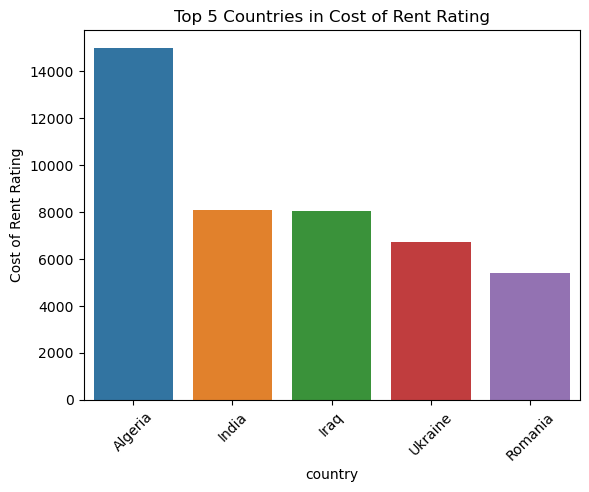

In [18]:
rent = country_rankings_df.sort_values(by=['rent_rating'], ascending=False).reset_index().loc[0:4, ['country', 'rent_rating']]
sns.barplot(data=rent, x='country', y='rent_rating')
plt.xlabel("country")
plt.xticks(rotation=45)
plt.ylabel("Cost of Rent Rating")
plt.title("Top 5 Countries in Cost of Rent Rating")

Text(0.5, 1.0, 'Top 5 Countries in Cost of Living and Rent Rating')

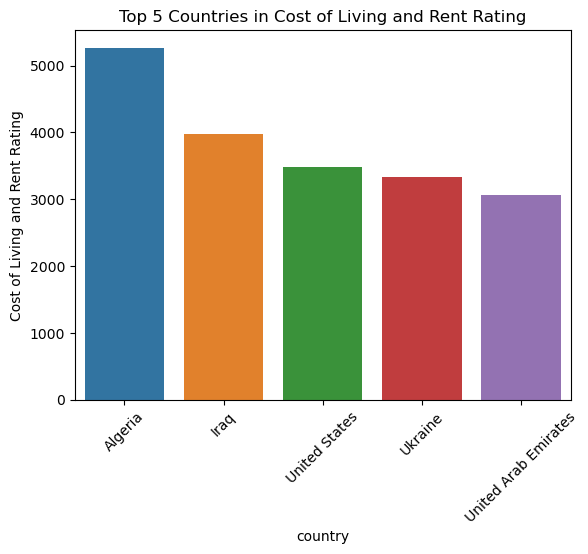

In [19]:
living_rent = country_rankings_df.sort_values(by=['living_rent_rating'], ascending=False).reset_index().loc[0:4, ['country', 'living_rent_rating']]
sns.barplot(data=living_rent, x='country', y='living_rent_rating')
plt.xlabel("country")
plt.xticks(rotation=45)
plt.ylabel("Cost of Living and Rent Rating")
plt.title("Top 5 Countries in Cost of Living and Rent Rating")

Text(0.5, 1.0, 'Top 5 Countries in Cost of Groceries Rating')

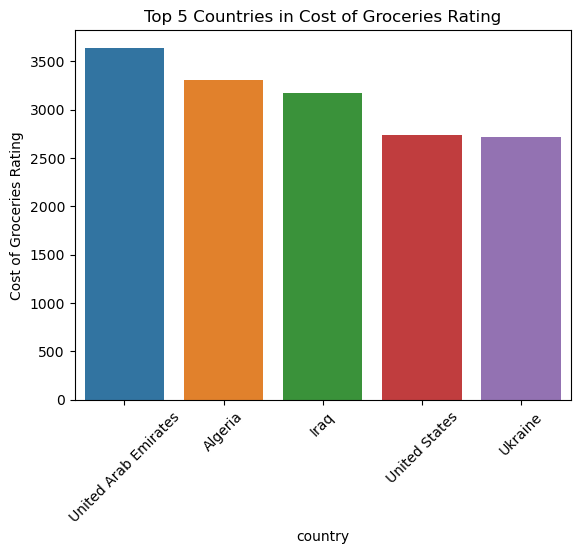

In [20]:
groceries = country_rankings_df.sort_values(by=['groceries_rating'], ascending=False).reset_index().loc[0:4, ['country', 'groceries_rating']]
sns.barplot(data=groceries, x='country', y='groceries_rating')
plt.xlabel("country")
plt.xticks(rotation=45)
plt.ylabel("Cost of Groceries Rating")
plt.title("Top 5 Countries in Cost of Groceries Rating")

Text(0.5, 1.0, 'Top 5 Countries in Restaurant Prices Rating')

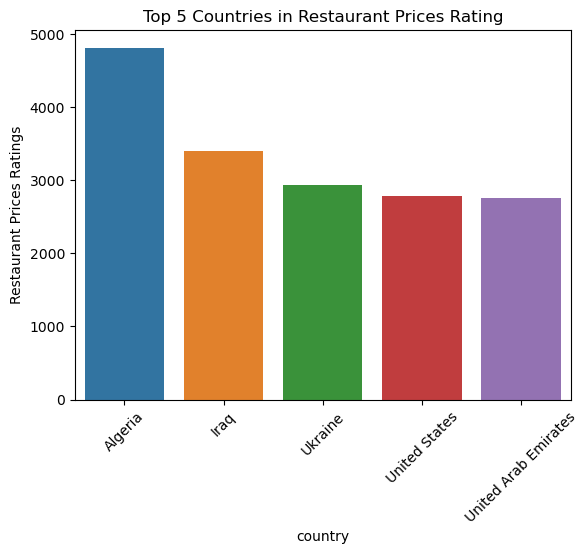

In [21]:
restaurant = country_rankings_df.sort_values(by=['restaurant_rating'], ascending=False).reset_index().loc[0:4, ['country', 'restaurant_rating']]
sns.barplot(data=restaurant, x='country', y='restaurant_rating')
plt.xlabel("country")
plt.xticks(rotation=45)
plt.ylabel("Restaurant Prices Ratings")
plt.title("Top 5 Countries in Restaurant Prices Rating")

Text(0.5, 1.0, 'Top 5 Countries in Purchasing Power Rating')

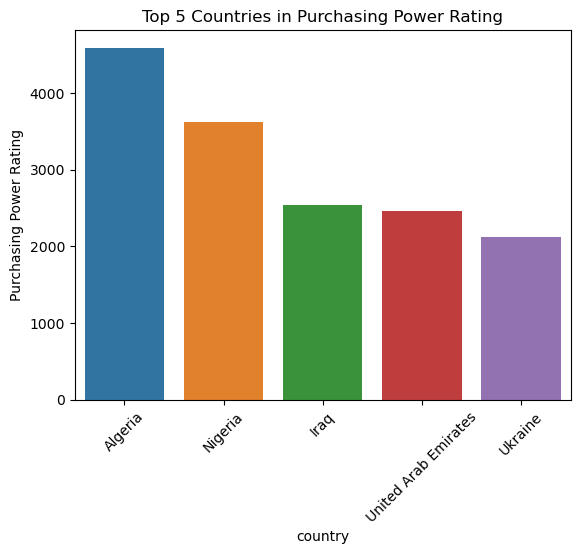

In [22]:
purchase = country_rankings_df.sort_values(by=['purchase_rating'], ascending=False).reset_index().loc[0:4, ['country', 'purchase_rating']]
sns.barplot(data=purchase, x='country', y='purchase_rating')
plt.xlabel("country")
plt.xticks(rotation=45)
plt.ylabel("Purchasing Power Rating")
plt.title("Top 5 Countries in Purchasing Power Rating")

### Top 5 Countries by Index

In [23]:
print("Top 5 Countries in Cost of Living:")
print(cost)
print("--------------------------------")
print("Top 5 Countries in Cost of Rent:")
print(rent)
print("--------------------------------")
print("Top 5 Countries in Cost of Rent and Living:")
print(living_rent)
print("--------------------------------")
print("Top 5 Countries in Cost of Groceries:")
print(groceries)
print("--------------------------------")
print("Top 5 Countries in Restaurant Prices:")
print(restaurant)
print("--------------------------------")
print("Top 5 Countries in Purchase Power:")
print(purchase)
print("--------------------------------")

Top 5 Countries in Cost of Living:
                country  cost_rating
0               Algeria  3351.206434
1  United Arab Emirates  2941.975197
2         United States  2766.908888
3                  Iraq  2745.744097
4               Ukraine  2363.755745
--------------------------------
Top 5 Countries in Cost of Rent:
   country   rent_rating
0  Algeria  14992.503748
1    India   8088.922156
2     Iraq   8032.128514
3  Ukraine   6703.910615
4  Romania   5390.835580
--------------------------------
Top 5 Countries in Cost of Rent and Living:
                country  living_rent_rating
0               Algeria         5268.703899
1                  Iraq         3970.617431
2         United States         3481.624758
3               Ukraine         3330.249769
4  United Arab Emirates         3060.551841
--------------------------------
Top 5 Countries in Cost of Groceries:
                country  groceries_rating
0  United Arab Emirates       3641.456583
1               Algeria       3